# Determine how risk of coup in African countries has changed over time.

*The question you will be answering for this video is to determine whether the risk of coup in African countries has changed over time. To do so, you will utilize the repeated measures ANOVA!*

*In order to do this, you will need a few different libraries. rcompanion, to do any data transformations, car to run the tests for homogeneity of variance, and dplyr, for looking at the means if you find signifciance.*

## Load libraries

In [32]:
library("rcompanion")
library("car")
library("dplyr")


Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
coups <- read.csv("C://Users/meredith.dodd/Documents/Data Science/105 Intermediate Statistics/Lesson 4/african_coups.csv")

In [10]:
head(coups)

date,country,commodities,commodities_excl_energy,energy,minerals,forestry,agriculture,fish,age,...,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,global_policy_uncertainty_current,couprisk,pctile_risk,relative_risk_classification
1/1/1997,Angola,313.45,254.08,609.35,285.31,341.36,170.16,870.14,55,...,5.545177,3.970292,1,0,0,-0.41474915,79.9359,0.001705101,0.7225125,High
1/1/1997,Algeria,313.45,254.08,609.35,285.31,341.36,170.16,870.14,56,...,4.564348,2.708050,1,0,0,0.70164311,79.9359,0.001822458,0.7359829,High
1/1/1997,South Africa,313.45,254.08,609.35,285.31,341.36,170.16,870.14,79,...,3.526361,3.526361,0,0,0,0.98816890,79.9359,0.001837309,0.7371534,High
1/1/1997,Uganda,313.45,254.08,609.35,285.31,341.36,170.16,870.14,53,...,5.267858,2.197225,1,0,0,0.07549572,79.9359,0.001940203,0.7469584,High
1/1/1997,Guinea Bissau,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,5.272999,3.401197,0,0,0,0.04635003,79.9359,0.002256377,0.7715377,High
1/1/1997,Liberia,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,4.343805,4.343805,0,0,0,-0.27843896,79.9359,0.002272123,0.7725644,High


## Data Wrangling

*Since you want to look at things by year, you will need to wrangle your data to pull year out from the date. This involves first transforming the date into a date variable, then pulling year off from it.*

*So let's first make year it's own variable.  You need to use the function as.Date, which is built into base R, and specify the format that your data is in.  You want a lowercase m for month as a number, a lowercase d for day as a number, and then a capital Y for a four digit Year. It all needs to be separated out by slashes, since that is how your data orginally reads in.*

### Making Year it's own variable

In [11]:
coups$date <- as.Date(coups$date, "%m/%d/%Y")

*go ahead and peek to make sure that came in right.*

In [12]:
head(coups)

date,country,commodities,commodities_excl_energy,energy,minerals,forestry,agriculture,fish,age,...,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,global_policy_uncertainty_current,couprisk,pctile_risk,relative_risk_classification
1997-01-01,Angola,313.45,254.08,609.35,285.31,341.36,170.16,870.14,55,...,5.545177,3.970292,1,0,0,-0.41474915,79.9359,0.001705101,0.7225125,High
1997-01-01,Algeria,313.45,254.08,609.35,285.31,341.36,170.16,870.14,56,...,4.564348,2.708050,1,0,0,0.70164311,79.9359,0.001822458,0.7359829,High
1997-01-01,South Africa,313.45,254.08,609.35,285.31,341.36,170.16,870.14,79,...,3.526361,3.526361,0,0,0,0.98816890,79.9359,0.001837309,0.7371534,High
1997-01-01,Uganda,313.45,254.08,609.35,285.31,341.36,170.16,870.14,53,...,5.267858,2.197225,1,0,0,0.07549572,79.9359,0.001940203,0.7469584,High
1997-01-01,Guinea Bissau,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,5.272999,3.401197,0,0,0,0.04635003,79.9359,0.002256377,0.7715377,High
1997-01-01,Liberia,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,4.343805,4.343805,0,0,0,-0.27843896,79.9359,0.002272123,0.7725644,High


*Next you need to lop off year, using the format function. Just put the variable name in, specify that you just want the year, and then stick into your new variable named Year.* 

In [13]:
coups$Year <- format(coups$date, "%Y")

In [14]:
head(coups)

date,country,commodities,commodities_excl_energy,energy,minerals,forestry,agriculture,fish,age,...,irregular,prev_conflict,pt_suc,pt_attempt,precip,global_policy_uncertainty_current,couprisk,pctile_risk,relative_risk_classification,Year
1997-01-01,Angola,313.45,254.08,609.35,285.31,341.36,170.16,870.14,55,...,3.970292,1,0,0,-0.41474915,79.9359,0.001705101,0.7225125,High,1997
1997-01-01,Algeria,313.45,254.08,609.35,285.31,341.36,170.16,870.14,56,...,2.708050,1,0,0,0.70164311,79.9359,0.001822458,0.7359829,High,1997
1997-01-01,South Africa,313.45,254.08,609.35,285.31,341.36,170.16,870.14,79,...,3.526361,0,0,0,0.98816890,79.9359,0.001837309,0.7371534,High,1997
1997-01-01,Uganda,313.45,254.08,609.35,285.31,341.36,170.16,870.14,53,...,2.197225,1,0,0,0.07549572,79.9359,0.001940203,0.7469584,High,1997
1997-01-01,Guinea Bissau,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,3.401197,0,0,0,0.04635003,79.9359,0.002256377,0.7715377,High,1997
1997-01-01,Liberia,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,4.343805,0,0,0,-0.27843896,79.9359,0.002272123,0.7725644,High,1997


*Now that you have a new variable you can work with, you will want to test assumptions, to make sure repeated measures ANOVA is right for you!*

## Testing Assumptions

### Normality

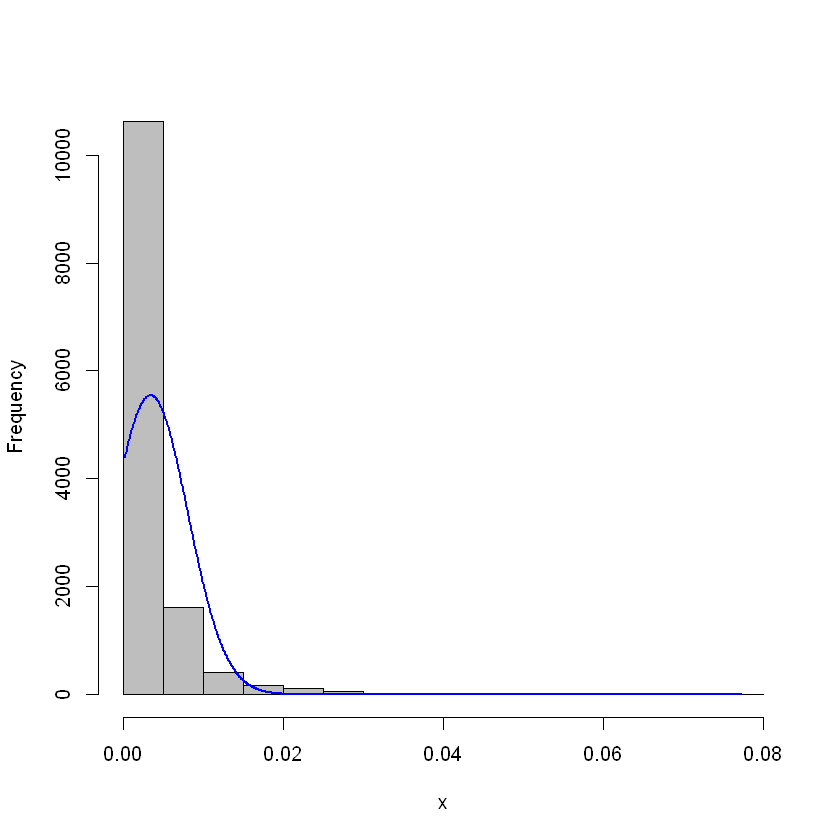

In [20]:
plotNormalHistogram(coups$couprisk)

*Wow, that doesn't look approximately normal in any way! Time to transform it. Since it is positively skewed, you will want to start by square rooting it.*

In [21]:
coups$coupriskSQRT <- sqrt(coups$couprisk)

In [23]:
head(coups)

date,country,commodities,commodities_excl_energy,energy,minerals,forestry,agriculture,fish,age,...,prev_conflict,pt_suc,pt_attempt,precip,global_policy_uncertainty_current,couprisk,pctile_risk,relative_risk_classification,Year,coupriskSQRT
1997-01-01,Angola,313.45,254.08,609.35,285.31,341.36,170.16,870.14,55,...,1,0,0,-0.41474915,79.9359,0.001705101,0.7225125,High,1997,0.04129287
1997-01-01,Algeria,313.45,254.08,609.35,285.31,341.36,170.16,870.14,56,...,1,0,0,0.70164311,79.9359,0.001822458,0.7359829,High,1997,0.04269026
1997-01-01,South Africa,313.45,254.08,609.35,285.31,341.36,170.16,870.14,79,...,0,0,0,0.98816890,79.9359,0.001837309,0.7371534,High,1997,0.04286384
1997-01-01,Uganda,313.45,254.08,609.35,285.31,341.36,170.16,870.14,53,...,1,0,0,0.07549572,79.9359,0.001940203,0.7469584,High,1997,0.04404774
1997-01-01,Guinea Bissau,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,0,0,0,0.04635003,79.9359,0.002256377,0.7715377,High,1997,0.04750134
1997-01-01,Liberia,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,...,0,0,0,-0.27843896,79.9359,0.002272123,0.7725644,High,1997,0.04766679


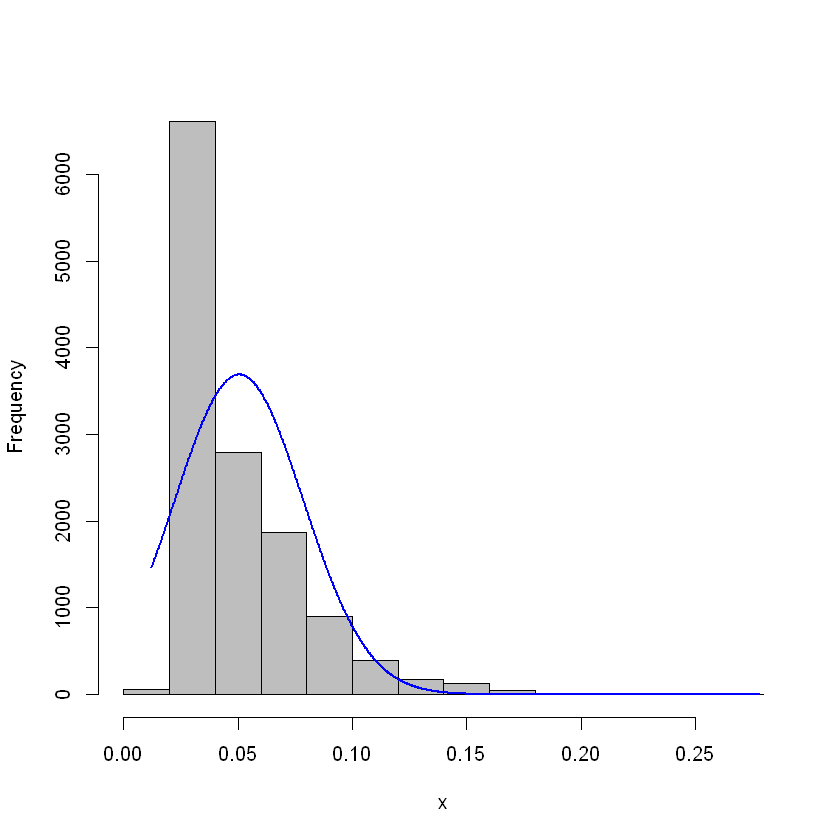

In [24]:
plotNormalHistogram(coups$coupriskSQRT)

*That looks approximately normal! Let's see if you can take it all the way home, or you'll stop there.*

In [25]:
coups$coupriskLOG <- log(coups$couprisk)

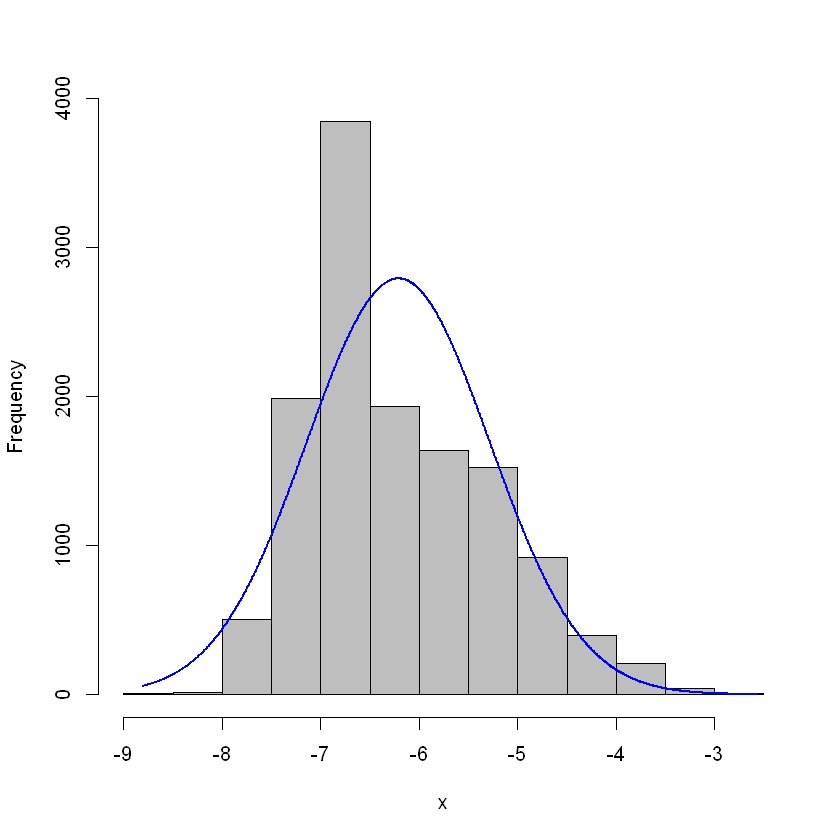

In [26]:
plotNormalHistogram(coups$coupriskLOG)

*Absolutely beautiful! You will want to stick with the log then. Your data now meets the assumption of normality. Time to move on to testing for homogeneity of variance.*

### Homogeneity of Variance

In [27]:
leveneTest(couprisk ~ country*Year, data=coups)

,Df,F value,Pr(>F)
group,1111,6.200478,0
,11925,NA,NA


*Since the p value is zero, this indicates significance, which means you have violated the assumption of homogeneity of variance.*

### Sample Size

*The same sample size requirements are put in place for repeated measures ANOVAs as any other ANOVA variation - you need at least 20 cases per independent variable. Since you only have one variable, you are good to go! It's now time to actually run your analysis.*

*You will still use the aov function.  However, you are adding a component here - Error, by country.  Basically, you are telling R that there is a within subjects factor that is repeated in the data, and that factor is country. Calll a summary, and take a peek at your results.*

# End video 1 here!

## Running the Analysis

In [17]:
RManova <- aov(couprisk~Year+Error(country), coups2)
summary(RManova)


Error: country
          Df  Sum Sq  Mean Sq F value Pr(>F)  
Year      22 0.05205 0.002366   2.146 0.0319 *
Residuals 26 0.02867 0.001103                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: Within
             Df  Sum Sq   Mean Sq F value Pr(>F)    
Year         22 0.01635 0.0007433   50.91 <2e-16 ***
Residuals 12966 0.18931 0.0000146                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

*Alright, this is significant! But how do you know whether the risk of a coup in these countries was rising or falling over the years? You can just look at their means. With some of the other ANOVAs, you might do a post hoc, but here, you can just look at the means per year to see if it is trending upward or downward, using good old dplyr.*

In [33]:
coupsMeans <- coups2 %>% group_by(Year) %>% summarize(Mean = mean(couprisk))

In [34]:
coupsMeans

Year,Mean
1997,0.005219185
1998,0.005546915
1999,0.005291660
2000,0.005385254
2001,0.004213157
2002,0.003728586
2003,0.004147628
2004,0.003141885
2005,0.003184883
2006,0.002405200


*Looks like although the risk was relatively small to begin with, less than 1%, it seems to be getting even smaller over the years, which is excellent.  Government stability is always a boon!*

### Note to self, this is how to do it with lm, though it doesn't take into account error in the same way

In [30]:
coupANOVA = lm(couprisk ~ Year + country, coups2)
anova(coupANOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Year,22,0.01614822,7.340099e-04,50.27216,1.139242e-210
country,48,0.08093219,1.686087e-03,115.47972,0.000000e+00
Residuals,12966,0.18931296,1.460072e-05,NA,NA
